# NaiveBayes from Scratch

SECTION 1: Guassian Naive Bayes
- Leveraged code from: https://chrisalbon.com/machine_learning/naive_bayes/naive_bayes_classifier_from_scratch/

SECTION 2: Multinomial Naive Bayes
- Leveraged code from: https://towardsdatascience.com/multinomial-naive-bayes-classifier-for-text-analysis-python-8dd6825ece67

Quick notes on the difference between the 3 main NB approaches:
- **Bernoulli Naive Bayes**: It assumes that all our features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .

- **Multinomial Naive Bayes** : Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.

- **Gaussian Naive Bayes** : Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.


# Section 1: Guassian Naive Bayes

Naive bayes is simple classifier known for doing well when only a small number of observations is available. In this tutorial we will create a gaussian naive bayes classifier from scratch and use it to predict the class of a previously unseen data point. This tutorial is based on an example on Wikipedia’s naive bayes classifier page, I have implemented it in Python and tweaked some notation to improve explanation.

In [231]:
#crete dataset
import pandas as pd
import numpy as np

# Create an empty dataframe
data = pd.DataFrame()

# Create our target variable
data['Gender'] = ['male','male','male','male','male','female','female','female','female','female',]

# Create our feature variables
data['h'] = [6,5.92,5.58,5.92,5.10,5.10,5,5.5,5.42,5.75]
data['w'] = [180,190,170,165,159,150,100,150,130,150]
data['fs'] = [12,11,12,10,9,8,6,8,7,9]

# View the data
data

,Gender,h,w,fs
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,male,5.10,159,9
5,female,5.10,150,8
6,female,5.00,100,6
7,female,5.50,150,8
8,female,5.42,130,7
9,female,5.75,150,9


In [232]:
#create data for a new row entry 
# Create an empty dataframe
person = pd.DataFrame()

# Create some feature values for this single row
person['h'] = [6]
person['w'] = [130]
person['fs'] = [8]

# View the data 
person

,h,w,fs
0,6,130,8


## Bayes Theorem
Bayes theorem is a famous equation that allows us to make predictions based on data. Here is the classic version of the Bayes theorem:

$\displaystyle P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}}$

This might be too abstract, so let us replace some of the variables to make it more concrete. In a bayes classifier, we are interested in finding out the class (e.g. male or female, spam or ham) of an observation given the data:

$p(\text{class} \mid \mathbf {\text{data}} )={\frac {p(\mathbf {\text{data}} \mid \text{class}) * p(\text{class})}{p(\mathbf {\text{data}} )}}$

where:
- class is a particular class (e.g. male)
- data is an observation’s data
- p(class|data) is called the posterior
- p(data|class) is called the likeliehood
- p(class) is called the prior
- p(data) is called the marginal probability

In a bayes classifier:
- **we calculate the posterior (technically we only calculate the numerator of the posterior, but ignore that for now) for every class for each observation.** 
- Then, classify the observation based on the class with the largest posterior value. 

#### In our example, we have one observation to predict and two possible classes (e.g. male and female), therefore we will calculate two posteriors: one for male and one for female.

$p(\text{person is male} \mid \mathbf {\text{person’s data}} )={\frac {p(\mathbf {\text{person’s data}} \mid \text{person is male}) * p(\text{person is male})}{p(\mathbf {\text{person’s data}} )}}$

$p(\text{person is female} \mid \mathbf {\text{person’s data}} )={\frac {p(\mathbf {\text{person’s data}} \mid \text{person is female}) * p(\text{person is female})}{p(\mathbf {\text{person’s data}} )}}$



## Gaussian Naive Bayes Classifier
A gaussian naive bayes is probably the most popular type of bayes classifier. To explain what the name means, let us look at what the bayes equations looks like when we apply our:
- two classes (male and female) and 
- three feature variables (height, weight, and footsize):

${\displaystyle {\text{posterior (male)}}={\frac {P({\text{male}})\,p({\text{height}}\mid{\text{male}})\,p({\text{weight}}\mid{\text{male}})\,p({\text{foot size}}\mid{\text{male}})}{\text{marginal probability}}}}$

${\displaystyle {\text{posterior (female)}}={\frac {P({\text{female}})\,p({\text{height}}\mid{\text{female}})\,p({\text{weight}}\mid{\text{female}})\,p({\text{foot size}}\mid{\text{female}})}{\text{marginal probability}}}}$

Now let us unpack the top equation a bit:
- **PRIOR:** P(male) is the prior probabilities. It is, as you can see, simply the probability an observation is male. **This is just the number of males in the dataset divided by the total number of people in the dataset.**
- **LIKELIHOOD:**  $p({\text{height}}\mid{\text{female}})\,p({\text{weight}}\mid{\text{female}})\,p({\text{foot size}}\mid{\text{female}})$ is the likelihood. Notice that we have unpacked person’s data so it is now every feature in the dataset. We essentially multiply the probability of each variable occuring independently at the same time. The **“gaussian” and “naive”** come from two assumptions present in this likelihood:
    - **ASSUMES INDEPENDENT FEATURES:** If you look each term in the likelihood you will notice that we assume each feature is uncorrelated from each other. That is, foot size is independent of weight or height etc.. This is obviously not true, and is a “naive” assumption - hence the name “naive bayes.”
    - **ASSUMES FEATURE DATA IS NORMALLY DISTRIBUTED:** Second, we assume have that the value of the features (e.g. the height of women, the weight of women) **are normally (gaussian) distributed.** This means that p(height|female) is calculated by inputing the required parameters into the probability density function of the normal distribution:

$p(\text{height}\mid\text{female})=\frac{1}{\sqrt{2\pi\text{variance of female height in the data}}}\,e^{ -\frac{(\text{observation’s height}-\text{average height of females in the data})^2}{2\text{variance of female height in the data}} }$
- **MARGINAL PROBABILITY:** is probably one of the most confusing parts of bayesian approaches. In toy examples (including ours) it is completely possible to calculate the marginal probability. **However, in many real-world cases, it is either extremely difficult or impossible to find the value of the marginal probability (explaining why is beyond the scope of this tutorial).** This is not as much of a problem for our classifier as you might think. Why? Because *we don’t care what the true posterior value is, we only care which class has a the highest posterior value.* And because the marginal probability is the same for all classes:
    - 1) we can ignore the denominator, 
    - 2) calculate only the posterior’s numerator for each class, and 
    - 3) pick the largest numerator. That is, we can ignore the posterior’s denominator and make a prediction solely on the relative values of the posterior’s numerator.

Okay! Theory over. Now let us start calculating all the different parts of the bayes equations.

## Calculate Priors
Priors can be either:
- constants (like in this lil example) or
- probability distributions (like in MCMC models?!?!)

In our example, this is simply the probability of being a gender. Calculating this is simple:

In [233]:
# Number of males
n_male = data['Gender'][data['Gender'] == 'male'].count()

# Number of males
n_female = data['Gender'][data['Gender'] == 'female'].count()

# Total rows
total_ppl = data['Gender'].count()

# Number of males divided by the total rows
P_male = n_male/total_ppl

# Number of females divided by the total rows
P_female = n_female/total_ppl
print("Male:", P_male)
print("Female:", P_female)

Male: 0.5
Female: 0.5


## Calculate Likelihood
Remember that each term (eg. p(height|female)) in our likelehood is assumed to be a normal probability distribution function. For example:

$p(\text{height}\mid\text{female})=\frac{1}{\sqrt{2\pi\text{variance of female height in the data}}}\,e^{ -\frac{(\text{observation’s height}-\text{average height of females in the data})^2}{2\text{variance of female height in the data}} }$

This means that for each class (e.g. female) and feature (e.g. height) combination we need to calculate the variance and mean value from the data. Pandas makes this easy:


In [234]:
# Group the data by gender and calculate the means of each feature
data_means = data.groupby('Gender').mean()

# View the values
data_means

,h,w,fs
Gender,,,
female,5.354,136.0,7.6
male,5.704,172.8,10.8


In [235]:
# Group the data by gender and calculate the variance of each feature
data_variance = data.groupby('Gender').var()

# View the values
data_variance

,h,w,fs
Gender,,,
female,0.09308,480.0,1.3
male,0.14028,151.7,1.7


In [236]:
#or you could do it manually for funsies
#remember, this is the SAMPLE VARIANCE/STD DEV... so you do n-1 for denominator
# HOWEVER, sklearns implementation DOES NOT USE DDOF, so we wont use it in our implementation
feat = 'w'
gend = 'male'
degrees_of_freedom = 0

select_data = data[data['Gender']==gend][feat]
sum_of_squares = sum([(x-select_data.mean())**2 for x in select_data])
variance = sum_of_squares/(select_data.count()-degrees_of_freedom)
variance

121.36000000000001

In [237]:
f_mask = data.Gender =='female'
m_mask = data.Gender =='male'

data[m_mask].var(ddof=0)

h       0.112224
w     121.360000
fs      1.360000
dtype: float64

**Now we can create all the variables we need. The code below might look complex but all we are doing is creating a variable out of each cell in both of the tables above.**



In [238]:
m_h_mean, m_w_mean, m_fs_mean = data[m_mask].mean()
m_h_var, m_w_var, m_fs_var = data[m_mask].var(ddof=0)

f_h_mean, f_w_mean, f_fs_mean = data[f_mask].mean()
f_h_var, f_w_var, f_fs_var = data[f_mask].var(ddof=0)

**Alright, now we need to create a function to calculate the probability density of each of the terms of the likelehood (eg $p(\text{height}\mid\text{female})$**

In [239]:
data

,Gender,h,w,fs
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,male,5.10,159,9
5,female,5.10,150,8
6,female,5.00,100,6
7,female,5.50,150,8
8,female,5.42,130,7
9,female,5.75,150,9


$p(\text{height}\mid\text{female})=\frac{1}{\sqrt{2\pi\text{variance of female height in the data}}}\,e^{ -\frac{(\text{observation’s height}-\text{average height of females in the data})^2}{2\text{variance of female height in the data}} }$

In [240]:
#create a function that calculates p(x | y):
def p_x_given_y(obs, mean_y, variance_y):
    #input the argument into a probability desnsity function
    denom = (np.sqrt(2*np.pi*variance_y))
    exp = np.exp((-(obs-mean_y)**2)/(2*variance_y))
    return 1/denom*exp

In [241]:
# Check scipy.stats to make sure its working!
from scipy.stats import norm
dist = norm(loc=m_h_mean, scale=np.sqrt(m_h_var))
for i in [5,5.5,6]:
    print('Scipy:', dist.pdf(i), 'Custom:', p_x_given_y(i, m_h_mean, m_h_var))

Scipy: 0.13088130319179492 Custom: 0.13088130319179492
Scipy: 0.9893330841735296 Custom: 0.9893330841735296
Scipy: 0.8060000587621732 Custom: 0.8060000587621733


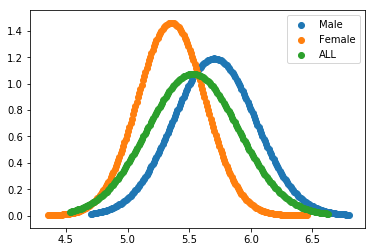

In [242]:
import matplotlib.pyplot as plt
# Male height dist
m_probs = []
m_heights = np.arange(m_h_mean-1,m_h_mean+1.1,0.01)
for h in m_heights:
    m_probs.append(p_x_given_y(h, m_h_mean, m_h_var))

# Female height dist
f_probs = []
f_heights = np.arange(f_h_mean-1,f_h_mean+1.1,0.01)
for h in f_heights:
    f_probs.append(p_x_given_y(h, f_h_mean, f_h_var))

# ALL height dist
all_h_mean = data['h'].mean()
all_h_var = data['h'].var()
all_probs = []
all_heights = np.arange(all_h_mean-1,all_h_mean+1.1,0.01)
for h in all_heights:
    all_probs.append(p_x_given_y(h, all_h_mean, all_h_var))
    
plt.scatter(x=m_heights, y=m_probs, label="Male")
plt.scatter(x=f_heights, y=f_probs, label="Female")
plt.scatter(x=all_heights, y=all_probs, label="ALL")

plt.legend()
plt.show()

## Apply Bayes Classifier To A New Data Point

OKIE DOKE! Our bayes classifier is ready to go. Remember that since we can ignore the marginal probability (the denominator), what we are actually calculating is this: 

${\displaystyle {\text{numerator of the posterior}}={P({\text{female}})\,p({\text{height}}\mid{\text{female}})\,p({\text{weight}}\mid{\text{female}})\,p({\text{foot size}}\mid{\text{female}})}{}}$

${\displaystyle {\text{denominator of the posterior}}=p(X)={p({\text{height}})\,p({\text{weight}})p({\text{footsize}})}{}}$

To do this, we just need to plug in the values of the unclassified person (height = 6), the variables of the dataset (e.g. mean of the female heigh, and the function (p_x_given_y) we made above.

In [243]:
data

,Gender,h,w,fs
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,male,5.10,159,9
5,female,5.10,150,8
6,female,5.00,100,6
7,female,5.50,150,8
8,female,5.42,130,7
9,female,5.75,150,9


In [244]:
person

,h,w,fs
0,6,130,8


In [245]:
#Numerator of the posterior if the unclassified observation is a male
posterior_numerator_male = P_male * p_x_given_y(person['h'], m_h_mean, m_h_var) *\
p_x_given_y(person['w'], m_w_mean, m_w_var) *\
p_x_given_y(person['fs'], m_fs_mean, m_fs_var)

#Numerator of the posterior if the unclassified observation is a female
posterior_numerator_female = P_female * p_x_given_y(person['h'], f_h_mean, f_h_var) *\
p_x_given_y(person['w'], f_w_mean, f_w_var) *\
p_x_given_y(person['fs'], f_fs_mean, f_fs_var)

denominator = posterior_numerator_male + posterior_numerator_female
print("Probability male: ", (posterior_numerator_male/denominator)[0])
print("Probability female: ", (posterior_numerator_female/denominator)[0])

Probability male:  0.0004724061915678271
Probability female:  0.9995275938084321


**Because the numerator of the posterior for female is greater than male, then we predict that the person is female.**

In [246]:
X = data.drop('Gender', axis=1)
y = data['Gender']

In [247]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)
predictions = model.predict_proba(person)[0]
print(predictions[0],predictions[1])

0.9995276020928201 0.0004723979071794123


**NICE! The sklearn prediction probabilities match the probabilities produced by our custom model.**

# <font color=blue> Section 2: Multinomial Naive Bayes </font>

Here we will cover how you can implement a Multinomial Naive Bayes Classifier for the 20 Newsgroups dataset. The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: 
- one for training (or development)
- the other one for testing (or for performance evaluation). 

The split between the train and test set is based upon a messages posted before and after a specific date

## Overview of main steps

First lets go over the basics of a Multinomial Naive Bayes Classifier! Remember, this basic equation still holds:

${\displaystyle {\text{posterior (classA)}}={\frac {P({\text{classA}})\,p({\text{feat1}}\mid{\text{classA}})\,p({\text{feat2}}\mid{\text{classA}})\,p({\text{feat3}}\mid{\text{classA}})}{\text{marginal probability}}}}$

However we will be replace the feature probabilities (in the numerator):
This replaces the gaussian formula used with continuous variables:
$p(\text{feat_n}\mid\text{classA})=\frac{1}{\sqrt{2\pi\text{var of feat_n for classA}}}\,e^{ -\frac{(\text{feat_n}-\text{average of feat_n for classA})^2}{2\text{variance of feat_n for classA}} }$

### Step 1. Calclate probabilities of each word per class
Since words are categorical features, the probability of each word per class is simply the count of the word in the class, divided by the total words in the class. 

So for **class j** and **word i**, the probability is given by:

![](images/mnb_1.png)

- where `word_ij` is the count of the word_i in class_j
- and `word_j` is the count of ALL words in class_j

However since some words have 0 counts, we will perform a Laplace Smoothing with a very smalle alpha term ɑ:

![](images/mnb_2.png)

- where **V** is an array of all the words in the vocabulary.

### Step 2. Calculate likliehood
This is the exact same as how we calculated likliehood in the Gaussian example. All we do is multiply the conditional probabilities of each feature together (again, we assume independence of the features).

![](images/mnb_3.png)
- ∝ = proportional to
- ∏ = product of all values in a range of series

For example, in the example below, where we are trying to determine the likeliehood of a phrase belonging to the 'Sports' class, is simply the product of the conditional probilities of all the words in the phrase:

![](images/mnb_4.png)
![](images/mnb_5.png)

These conditional probablities are simply the probabilities we calculated in the first step (we use these instead of the Gausian distribution probabilties)


### Step 3. Laplace Smoothing

In the final step we calculate the probabilities and compare which has a higher probability: **P(a very beautiful goal | Sports)** or **P(a very beautiful goal | Not Sports).**

But we have a problem! The word “goal” does not exist in the category 'Not Sports', thus P(goal| Sports) = 0, leading to P(a very beautiful goal | Sports)=0. It is problematic when a **frequency-based probability is zero, because it will wipe out all the information in the other probabilities,** and we need to find a solution for this.

A solution would be **Laplace smoothing**, which is a technique for smoothing categorical data:
- A small-sample correction, or pseudo-count, will be incorporated in every probability estimate. Consequently, no probability will be zero.
- Note: In statistics, additive smoothing, is also called Laplace smoothing

#### Here's how Laplace Smoothing works:

Given an observation x = (x1, …, xd) from a multinomial distribution with N trials and parameter vector θ = (θ1, …, θd), a "smoothed" version of the data gives the estimator:
![](images/mnb_6.png)

   - where the pseudo-count α > 0 is the smoothing parameter (α = 0 corresponds to no smoothing). 
   - and `d` is the number of words in the corpus

In other words, we add alpha to every count so it’s never zero. To balance this, we add (alpha \* the number of possible words) to the divisor, so the product will never be greater than 1. 



## Run the calculations

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import os
from collections import Counter

### Class distribution

First we calculate the fraction of documents in each class.

In [359]:
# Load data
root = 'datasets/MNB/20news-bydate/matlab'
train_label = open(os.path.join(root,'train.label'))

# Extract labels
lines = train_label.readlines()
n_obs = len(lines)
print("n_obs:", n_obs)

# Clean labels
labels = [int(x.replace('\n','')) for x in lines]

# Extract p for each label
label_proba = {}
for i in range(1,21):
    label_proba[i] = 0

# Count the occurence of each class
counter = Counter(labels)

# Divide each element by total
for key in counter:
    counter[key] = counter[key]/n_obs

pi = dict(counter.items())
pi

n_obs: 11269


{1: 0.04259472890229834,
 2: 0.05155736977549028,
 3: 0.05075871860857219,
 4: 0.05208980388676901,
 5: 0.051024935664211554,
 6: 0.052533498979501284,
 7: 0.051646108794036735,
 8: 0.052533498979501284,
 9: 0.052888455053687104,
 10: 0.0527109770165942,
 11: 0.05306593309078002,
 12: 0.0527109770165942,
 13: 0.05244475996095483,
 14: 0.0527109770165942,
 15: 0.052622237998047744,
 16: 0.05315467210932647,
 17: 0.04836276510781791,
 18: 0.05004880646020055,
 19: 0.04117490460555506,
 20: 0.033365870973467035}

### Probability Distribution over Vocabulary

In [368]:
# Training data
train_data = open(os.path.join(root,'train.data'))
cols = ['docIdx', 'wordIdx', 'count']
df = pd.read_csv(train_data, delimiter=' ', names=cols)

# Data should be sparse matrix format!
df.tail()

,docIdx,wordIdx,count
1467340,11269,47387,1
1467341,11269,48339,1
1467342,11269,48919,1
1467343,11269,51544,1
1467344,11269,53958,1


In [369]:
# Join labels to df
df_y = pd.DataFrame({'classIdx':labels,'docIdx':range(1,len(labels)+1)})
df = pd.merge(df, df_y)
print(df.shape)
print(df.sum())
df.head(100)


(1467345, 4)
docIdx      9166920894
wordIdx     9271195849
count          2765300
classIdx      16684449
dtype: int64


,docIdx,wordIdx,count,classIdx
0,1,1,4,1
1,1,2,2,1
2,1,3,10,1
3,1,4,4,1
4,1,5,2,1
5,1,6,1,1
6,1,7,1,1
7,1,8,1,1
8,1,9,3,1
9,1,10,9,1


In [370]:
#Alpha value for smoothing
a = 0.001

#Calculate probability of each word based on class
pb_ij = df.groupby(['classIdx','wordIdx'])
pb_j = df.groupby(['classIdx'])
Pr =  (pb_ij['count'].sum() + a) / (pb_j['count'].sum() + 16689)    

#Unstack series
Pr = Pr.unstack()

#Replace NaN or columns with 0 as word count with a/(count+|V|+1)
for c in range(1,21):
    Pr.loc[c,:] = Pr.loc[c,:].fillna(a/(pb_j['count'].sum()[c] + 16689))

#Convert to dictionary for greater speed
Pr_dict = Pr.to_dict()

Pr

wordIdx,1,2,3,4,5,6,7,8,9,10,...,53966,53967,53968,53969,53970,53971,53972,53973,53974,53975
classIdx,,,,,,,,,,,,,,,,,,,,,
1,7.855542e-05,0.000381,1.661627e-03,5.438638e-05,0.000495,0.000248,3.625960e-05,6.048302e-06,0.000205,8.459224e-04,...,6.042260e-09,6.042260e-09,6.042260e-09,6.042260e-09,6.042260e-09,6.042260e-09,6.042260e-09,6.042260e-09,6.042260e-09,6.042260e-09
2,4.722740e-04,0.000464,7.871103e-09,1.338166e-04,0.000110,0.000457,7.871890e-05,4.723449e-05,0.001354,2.362118e-05,...,7.871103e-09,7.871103e-09,7.871103e-09,7.871103e-09,7.871103e-09,7.871103e-09,7.871103e-09,7.871103e-09,7.871103e-09,7.871103e-09
3,1.023768e-04,0.000642,9.306135e-09,1.582136e-04,0.000195,0.000316,1.862158e-05,1.862158e-05,0.001340,9.306135e-09,...,9.306135e-09,9.306135e-09,9.306135e-09,9.306135e-09,9.306135e-09,9.306135e-09,9.306135e-09,9.306135e-09,9.306135e-09,9.306135e-09
4,6.907239e-05,0.000268,8.632969e-09,8.632969e-09,0.000086,0.000414,1.727457e-05,8.641602e-06,0.000414,8.632969e-09,...,8.632969e-09,8.632969e-09,8.632969e-09,8.632969e-09,8.632969e-09,8.632969e-09,8.632969e-09,8.632969e-09,8.632969e-09,8.632969e-09
5,5.833066e-05,0.000321,9.720157e-09,9.729877e-06,0.000010,0.000457,9.729877e-06,9.720157e-09,0.000457,9.720157e-09,...,9.720157e-09,9.720157e-09,9.720157e-09,9.720157e-09,9.720157e-09,9.720157e-09,9.720157e-09,9.720157e-09,9.720157e-09,9.720157e-09
6,2.772348e-04,0.001309,5.898487e-09,4.659864e-04,0.000088,0.000307,1.238741e-04,1.770136e-05,0.001398,5.898487e-09,...,5.898487e-09,5.898487e-09,5.898487e-09,5.898487e-09,5.898487e-09,5.898487e-09,5.898487e-09,5.898487e-09,5.898487e-09,5.898487e-09
7,1.285628e-08,0.000360,1.285628e-08,2.572542e-05,0.000026,0.000411,1.285628e-08,1.285628e-08,0.000360,3.858170e-05,...,1.285628e-08,1.285628e-08,1.285628e-08,1.285628e-08,1.285628e-08,1.285628e-08,1.285628e-08,1.285628e-08,1.285628e-08,1.285628e-08
8,6.881972e-05,0.000413,7.645786e-09,7.645786e-09,0.000099,0.000658,5.352815e-05,2.294500e-05,0.000138,7.645786e-09,...,7.645786e-09,7.645786e-09,7.645786e-09,7.645786e-09,7.645786e-09,7.645786e-09,7.645786e-09,7.645786e-09,7.645786e-09,7.645786e-09
9,1.173399e-04,0.000562,8.380825e-09,3.353168e-05,0.000034,0.000696,2.515085e-05,8.389205e-06,0.000034,8.380825e-09,...,8.380825e-09,8.380825e-09,8.380825e-09,8.380825e-09,8.380825e-09,8.380825e-09,8.380825e-09,8.380825e-09,8.380825e-09,8.380825e-09


### Stopwords

Stop words are words that show up a lot in every document (e.g. prepositions and pronouns). Lets get rid of them!

In [402]:
#Common stop words from online
stop_words = [
"a", "about", "above", "across", "after", "afterwards", 
"again", "all", "almost", "alone", "along", "already", "also",    
"although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "as", "at", "be", "became", "because", "become","becomes", "becoming", "been", "before", "behind", "being", "beside", "besides", "between", "beyond", "both", "but", "by","can", "cannot", "cant", "could", "couldnt", "de", "describe", "do", "done", "each", "eg", "either", "else", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "find","for","found", "four", "from", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "i", "ie", "if", "in", "indeed", "is", "it", "its", "itself", "keep", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mine", "more", "moreover", "most", "mostly", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next","no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part","perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "she", "should","since", "sincere","so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "take","than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they",
"this", "those", "though", "through", "throughout",
"thru", "thus", "to", "together", "too", "toward", "towards",
"under", "until", "up", "upon", "us",
"very", "was", "we", "well", "were", "what", "whatever", "when",
"whence", "whenever", "where", "whereafter", "whereas", "whereby",
"wherein", "whereupon", "wherever", "whether", "which", "while", 
"who", "whoever", "whom", "whose", "why", "will", "with",
"within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves"
]
print(len(stop_words))

257


In [403]:
# Now, let’s create the vocabulary dataframe
vocab = open(os.path.join(root,'vocabulary.txt')) 
vocab_df = pd.read_csv(vocab, names = ['word']) 
vocab_df = vocab_df.reset_index() 
vocab_df['index'] = vocab_df['index'].apply(lambda x: x+1) 
print(vocab_df.shape)
vocab_df.head()

(61188, 2)


,index,word
0,1,archive
1,2,name
2,3,atheism
3,4,resources
4,5,alt


In [404]:
#Getting the counts of each word in the vocabulary and setting stop words to 0: 

#Index of all words
tot_list = set(vocab_df['index'])

#Index of good words
vocab_df = vocab_df[~vocab_df['word'].isin(stop_words)]
good_list = vocab_df['index'].tolist()
good_list = set(good_list)

#Index of stop words
bad_list = tot_list - good_list

#Set all stop words to 0
for bad in bad_list:
    for j in range(1,21):
        Pr_dict[j][bad] = a/(pb_j['count'].sum()[j] + 16689)

In [405]:
list(bad_list)[0:5]

[1025, 2, 2562, 1028, 1033]

In [409]:
for bad in list(bad_list)[0:10]:
    print(Pr_dict[1][bad])

6.042259563386324e-09
6.042259563386324e-09
6.042259563386324e-09
6.042259563386324e-09
6.042259563386324e-09
6.042259563386324e-09
6.042259563386324e-09
6.042259563386324e-09
6.042259563386324e-09
6.042259563386324e-09


## Implement the model

### Run on training data

In [406]:
df.head()

,docIdx,wordIdx,count,classIdx
0,1,1,4,1
1,1,2,2,1
2,1,3,10,1
3,1,4,4,1
4,1,5,2,1


In [411]:
root

'datasets/MNB/20news-bydate/matlab'

In [407]:
#Calculate IDF 
tot = len(df['docIdx'].unique()) 
pb_ij = df.groupby(['wordIdx']) 
IDF = np.log(tot/pb_ij['docIdx'].count()) 
IDF_dict = IDF.to_dict()

def MNB(df, smooth = False, IDF = False):
    '''
    Multinomial Naive Bayes classifier
    :param df [Pandas Dataframe]: Dataframe of data
    :param smooth [bool]: Apply Smoothing if True
    :param IDF [bool]: Apply Inverse Document Frequency if True
    :return predict [list]: Predicted class ID
    '''
    #Using dictionaries for greater speed
    df_dict = df.to_dict()
    new_dict = {}
    prediction = []
    
    #new_dict = {docIdx : {wordIdx: count},....}
    for idx in range(len(df_dict['docIdx'])):
        docIdx = df_dict['docIdx'][idx]
        wordIdx = df_dict['wordIdx'][idx]
        count = df_dict['count'][idx]
        try: 
            new_dict[docIdx][wordIdx] = count 
        except:
            new_dict[df_dict['docIdx'][idx]] = {}
            new_dict[docIdx][wordIdx] = count

    #Calculating the scores for each doc
    for docIdx in range(1, len(new_dict)+1):
        score_dict = {}
        #Creating a probability row for each class
        for classIdx in range(1,21):
            score_dict[classIdx] = 1
            #For each word:
            for wordIdx in new_dict[docIdx]:
                #Check for frequency smoothing
                #log(1+f)*log(Pr(i|j))
                if smooth: 
                    try:
                        probability=Pr_dict[wordIdx][classIdx]         
                        power = np.log(1+ new_dict[docIdx][wordIdx])     
                        #Check for IDF
                        if IDF:
                            score_dict[classIdx]+=(
                               power*np.log(
                               probability*IDF_dict[wordIdx]))
                        else:
                            score_dict[classIdx]+=power*np.log(
                                                   probability)
                    except:
                        #Missing V will have log(1+0)*log(a/16689)=0 
                        score_dict[classIdx] += 0                        
                #f*log(Pr(i|j))
                else: 
                    try:
                        probability = Pr_dict[wordIdx][classIdx]        
                        power = new_dict[docIdx][wordIdx]               
                        score_dict[classIdx]+=power*np.log(
                                           probability) 
                        #Check for IDF
                        if IDF:
                            score_dict[classIdx]+= power*np.log(
                                   probability*IDF_dict[wordIdx]) 
                    except:
                        #Missing V will have 0*log(a/16689) = 0
                        score_dict[classIdx] += 0      
            #Multiply final with pi         
            score_dict[classIdx] +=  np.log(pi[classIdx])                          

        #Get class with max probabilty for the given docIdx 
        max_score = max(score_dict, key=score_dict.get)
        prediction.append(max_score)
        
    return prediction

In [412]:
# Comparing the effects of smoothing and IDF:
regular_predict = MNB(df, smooth=False, IDF=False)
smooth_predict  = MNB(df, smooth=True, IDF=False)
tfidf_predict   = MNB(df, smooth=False, IDF=True)
all_predict     = MNB(df, smooth=True, IDF=True)
#Get list of labels
train_label = pd.read_csv('datasets/MNB/20news-bydate/matlab/train.label',
                          names=['t'])
train_label= train_label['t'].tolist()
total = len(train_label) 
models = [regular_predict, smooth_predict, 
          tfidf_predict, all_predict] 
strings = ['Regular', 'Smooth', 'IDF', 'Both'] 
 
for m,s in zip(models,strings):
    val = 0
    for i,j in zip(m, train_label):
        if i != j:
            val +=1
        else:
            pass   
    print(s,"Error:\t\t",val/total * 100, "%")

Regular Error:		 3.4608217233117404 %
Smooth Error:		 1.8546454876209069 %
IDF Error:		 3.478569527021031 %
Both Error:		 1.8546454876209069 %


### Run on test data

In [413]:
#Get test data
test_data = open('datasets/MNB/20news-bydate/matlab/test.data')
df = pd.read_csv(test_data, delimiter=' ', names=['docIdx', 'wordIdx', 'count'])

#Get list of labels
test_label = pd.read_csv('datasets/MNB/20news-bydate/matlab/test.label', names=['t'])
test_label= test_label['t'].tolist()

#MNB Calculation
predict = MNB(df, smooth = True, IDF = False)

total = len(test_label)
val = 0
for i,j in zip(predict, test_label):
    if i == j:
        val +=1
    else:
        pass
print("Error:\t",(1-(val/total)) * 100, "%")

Error:	 22.571618920719516 %
